In [2]:
## 필요 패키지들 import
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
from Bio import SeqIO

- 참조 코드  
https://ichi.pro/ko/biopython-eul-sayonghan-covid-19-dna-bunseog-201616407701466

- 데이터 출처  
https://www.kaggle.com/datasets/paultimothymooney/coronavirus-genome-sequence?select=MN908947.fna

In [47]:
covid19 = SeqIO.read('../dataset/fasta/covid19.fna', 'fasta')
covid_dna = covid19.seq

print(f'코로나 바이러스 DNA (길이 : {len(covid_dna)}) \n{covid_dna[:100]}')

코로나 바이러스 DNA (길이 : 29903) 
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC


코로나 바이러스에서의 염기별 갯수 
{'A': 8954, 'G': 5863, 'C': 5492, 'T': 9594}


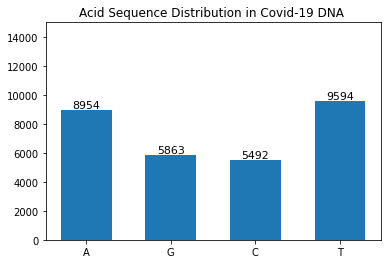

In [25]:
## 염기 서열 갯수 비교
num_sequences = {seq : covid_dna.count(seq) for seq in ['A', 'G', 'C', 'T']}
print(f'코로나 바이러스에서의 염기별 갯수 \n{num_sequences}')

plt.bar(num_sequences.keys(), num_sequences.values(), width = 0.6)
plt.title('Acid Sequence Distribution in Covid-19 DNA ')
plt.ylim(0, 15000)

for seq, num in num_sequences.items():
    plt.text(seq, num, num,
             fontsize = 11, color = 'black',
             horizontalalignment = 'center',
             verticalalignment = 'bottom')
plt.show()

In [29]:
## 코로나 바이러스 전사
covid_mRNA = covid_dna.transcribe()

print(f'코로나 DNA :        {covid_dna[:60]} \n코로나 mRNA :       {covid_mRNA[:60]}')

## 코로나 mRNA 번역
translated_mRNA = covid_mRNA.translate()
print(f'번역된 covid mRNA : {translated_mRNA[:60]} \n')
print(f'코로나 바이러스에 {len(translated_mRNA)} 개의 아미노산 서열이 있음.')

코로나 DNA :        ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCT 
코로나 mRNA :       AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCU
번역된 covid mRNA : IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSI 

코로나 바이러스에 9967 개의 아미노산 서열이 있음.


In [46]:
## 번역된 아미노산 사슬은 정지 코돈(UAA, UAG, UGA)인 *로 구분됨.
proteins = translated_mRNA.split('*')
print(f'코로나 바이러스에 총 {len(proteins)}개의 단백질이 있음. \n==== 단백질 목록 ====\n')

for idx, protein in enumerate(proteins[:], 1):
    print(f'[protein-{idx}] {protein}')
    
    if len(protein) < 50:
        proteins.remove(protein)
        
print(f'\n코로나 바이러스에 아미노산이 50개 이상인 단백질의 갯수 : {len(proteins)} \n==== 필터링 된 단백질 목록 ====\n')
for idx, protein in enumerate(proteins, 1):
    print(f'[trimmed-protein-{idx}] {protein}')

코로나 바이러스에 총 775개의 단백질이 있음. 
==== 단백질 목록 ====

[protein-1] IKGLYLPR
[protein-2] QTNQLSISCRSVL
[protein-3] TNFKICVAVTRLHA
[protein-4] CTHAV
[protein-5] LITNYCR
[protein-6] QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER
[protein-7] DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS
[protein-8] RWHLWLSRS
[protein-9] KRRFAST
[protein-10] TALCVHQTFGCSNCTSWSCYG
[protein-11] AGSRTRRHSVRS
[protein-12] W
[protein-13] DTWCPCPSCGRNTSGLPQGSSS
[protein-14] ER
[protein-15] 
[protein-16] RSWWP
[protein-17] LRRRSKVI
[protein-18] LRRRAWH
[protein-19] SL
[protein-20] RFSRKLEH
[protein-21] T
[protein-22] QWCYP
[protein-23] THA
[protein-24] A
[protein-25] RRGIHSLCR
[protein-26] QLLWP
[protein-27] WLPS
[protein-28] VH
[protein-29] RPSSTCW
[protein-30] SFMHFVRTTGLY
[protein-31] H
[protein-32] EGCILLP
[protein-33] T
[protein-34] A
[protein-35] NCLVHGTF
[protein-36] KEL
[protein-37] IADTF
[protein-38] N
[protein-39] IGKEI
[protein-40] HLQWGMSKFCISLKFHNQDYSTKG
[protein-41] KEKA
[protein-42] WLYG
[protein-43] NSICLSSCVTK
[prot

(<AxesSubplot:title={'center':'COVID-19 : open reading frames'}>,
 ({GF(source, 0-29903 (1)): 0,
   GF(5'UTR, 0-265 (1)): 1.0,
   GF(ORF1ab, 265-21555 (1)): 1.0,
   GF(ORF1ab, 265-21555 (1)): 2.0,
   GF(ORF1ab, 265-805 (1)): 4.0,
   GF(ORF1ab, 805-2719 (1)): 4.0,
   GF(ORF1ab, 2719-8554 (1)): 4.0,
   GF(ORF1ab, 8554-10054 (1)): 4.0,
   GF(ORF1ab, 10054-10972 (1)): 4.0,
   GF(ORF1ab, 10972-11842 (1)): 4.0,
   GF(ORF1ab, 11842-12091 (1)): 4.0,
   GF(ORF1ab, 12091-12685 (1)): 4.0,
   GF(ORF1ab, 12685-13024 (1)): 4.0,
   GF(ORF1ab, 13024-13441 (1)): 4.0,
   GF(ORF1ab, 13441-16236 (1)): 4.0,
   GF(ORF1ab, 16236-18039 (1)): 3.0,
   GF(ORF1ab, 18039-19620 (1)): 3.0,
   GF(ORF1ab, 19620-20658 (1)): 3.0,
   GF(ORF1ab, 20658-21552 (1)): 3.0,
   GF(ORF1ab, 265-13483 (1)): 3.0,
   GF(ORF1ab, 265-805 (1)): 5.0,
   GF(ORF1ab, 805-2719 (1)): 5.0,
   GF(ORF1ab, 2719-8554 (1)): 5.0,
   GF(ORF1ab, 8554-10054 (1)): 5.0,
   GF(ORF1ab, 10054-10972 (1)): 5.0,
   GF(ORF1ab, 10972-11842 (1)): 5.0,
   GF(ORF1a

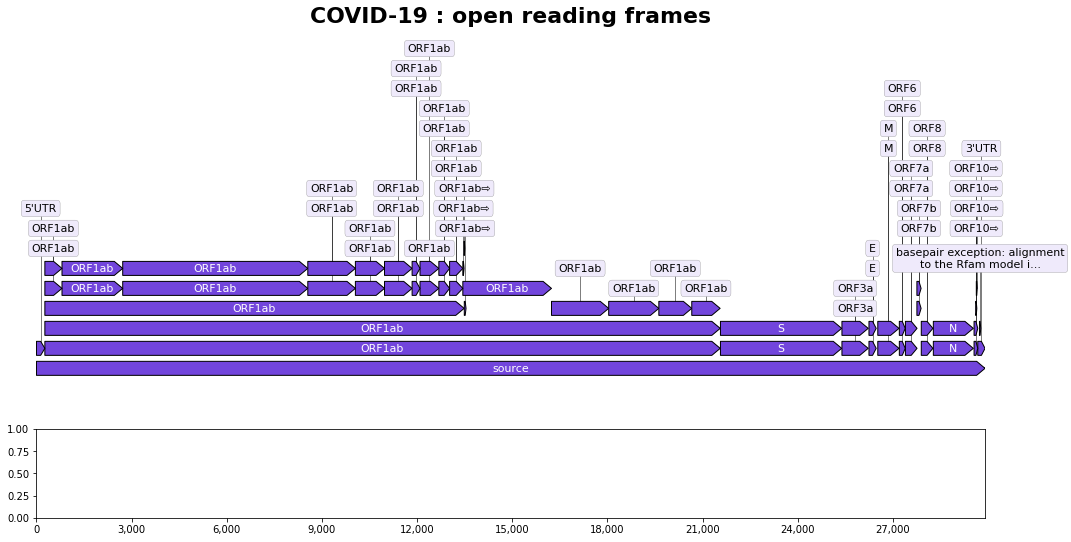

In [51]:
## 오픈 리딩 프레임은 아미노산으로 번역 될 때 정지 코돈을 포함하지 않는 DNA 분자의 일부.
## 유전자 코드는 3개의 염기쌍 그룹으로 DNA 서열(코돈)을 읽음.
## i.e. 이중 가닥 DNA 분자는 6개의 가능한 판독 프레임 중 하나를 읽을 수 있음.

## DNA에서 오픈 리딩 프레임을 시각화하려면 
## dna_features_viewer와 bcbio-gff 라이브러리 필요
from dna_features_viewer import BiopythonTranslator
import numpy as np


fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize = (17, 9), sharex = True, 
    gridspec_kw = {"height_ratios" : [4, 1]})

ax1.set_title("COVID-19 : open reading frames", size = 22, weight = "bold")
record = SeqIO.read('../dataset/genbank/sequence.gb.txt', 'genbank')

graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax = ax1, with_ruler = False, strand_in_label_threshold = 4)

